In [21]:
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from model import Model
from matplotlib import pyplot as plt
import pandas as pd
np.random.seed(0)
from utils import plot_loss_histories_one_plot_log, plot_loss_histories_one_plot, plot_loss_histories, run_experiment

## Generated dataset


In [22]:
n_samples = 1000 
n_features = 10  
X_train = np.random.randn(n_samples, n_features)
y_train = np.random.choice([-1, 1], size=n_samples)

In [23]:
for i in [100, 200, 300, 400, 500, 800]:
    accuracies, loss_histories, optimal_params = run_experiment(X_train, y_train, iter_=1, max_iter=i)
    print(pd.DataFrame(optimal_params))

                                                       L-BFGS-B  \
Optimal n     [0.0, 0.15298064665119054, 0.01771067367302682...   
Optimal p     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Optimal w     [0.0, 0.15298064665119054, 0.01771067367302682...   
Optimal b                                             -0.039759   
Minimum loss                                          68.877808   

                                                         COBYLA  \
Optimal n     [0.06706430365409932, 0.11591358433078366, 0.4...   
Optimal p     [0.0009436090443139672, -1.8388068845354155e-1...   
Optimal w     [0.06612069460978535, 0.11591358433078384, 0.1...   
Optimal b                                              0.059331   
Minimum loss                                          77.969432   

                                                          SLSQP  
Optimal n     [1.3158988725576312e-14, 0.15301070123273755, ...  
Optimal p     [1.4728987197397027e-14, 3.347907049816366e-13..

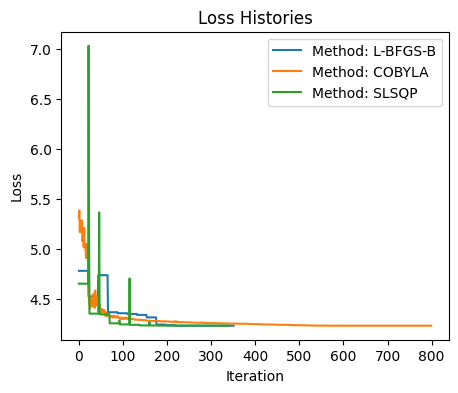

In [24]:
plot_loss_histories_one_plot_log(loss_histories)

## UCI Dataset

### Breast Cancer Wisconsin Diagnostic

In [25]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
X = breast_cancer_wisconsin_diagnostic.data.features.to_numpy()
y = breast_cancer_wisconsin_diagnostic.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {'M': -1, 'B': 1}
y = np.vectorize(label_mapping.get)(y)

In [26]:
accuracies, loss_histories, optimal_params = run_experiment(X, y, iter_=1)
pd.DataFrame(optimal_params)

,L-BFGS-B,COBYLA,SLSQP
Optimal n,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.518833226893499e-16, 7.309126312118314e-17,...","[4.4942235946807876e-14, 1.3849355059404513e-1..."
Optimal p,"[0.0, 0.2998216090286082, 0.0, 0.0, 0.0, 0.0, ...","[0.2734808957576287, 0.2710453147850586, -4.46...","[7.416363627352086e-14, 0.29963183545830924, 6..."
Optimal w,"[0.0, -0.2998216090286082, 0.0, 0.0, 0.0, 0.0,...","[-0.2734808957576285, -0.27104531478505856, 7....","[-2.922140032671298e-14, -0.2996318354582954, ..."
Optimal b,0.657376,0.648592,0.657318
Minimum loss,15.573,15.868595,15.573001


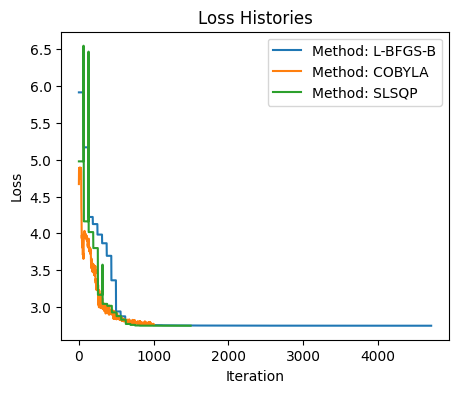

In [27]:
plot_loss_histories_one_plot_log(loss_histories)

In [28]:
accuracies_breast_cancer, loss_histories_breast_cancer, optimal_params = run_experiment(X, y)
average_accuracies_breast_cancer = {method: np.mean(values) for method, values in accuracies_breast_cancer.items()}

/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:28: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:28: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:28: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)


### Banknote Authentication

In [29]:
banknote_authentication = fetch_ucirepo(id=267) 
  
X = banknote_authentication.data.features.to_numpy()
y = banknote_authentication.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {0: -1, 1: 1}
y = np.vectorize(label_mapping.get)(y)

In [30]:
accuracies, loss_histories, optimal_params = run_experiment(X, y, iter_=1)
pd.DataFrame(optimal_params)

,L-BFGS-B,COBYLA,SLSQP
Optimal n,"[0.0, 0.0, 0.0, 0.0]","[-3.9157734289320057e-20, -3.163188105335342e-...","[8.958580763684957e-15, 6.8795501949365924e-15..."
Optimal p,"[3.5034496851863883, 3.386616976208596, 2.9591...","[3.5031804525146812, 3.3863344930175856, 2.958...","[3.503173647036842, 3.386397058182385, 2.95894..."
Optimal w,"[-3.5034496851863883, -3.386616976208596, -2.9...","[-3.5031804525146812, -3.3863344930175856, -2....","[-3.5031736470368333, -3.386397058182378, -2.9..."
Optimal b,-0.886463,-0.886422,-0.886468
Minimum loss,17.362253,17.362253,17.362253


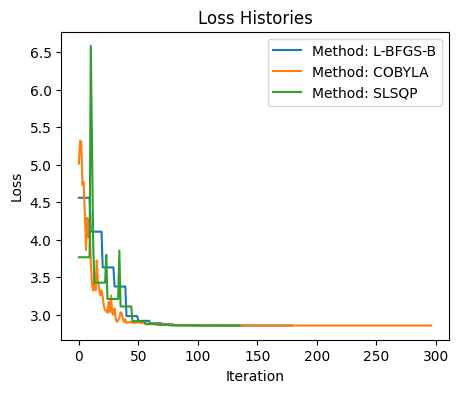

In [31]:
plot_loss_histories_one_plot_log(loss_histories)

In [32]:
accuracies_banknote, loss_histories_banknote, optimal_params = run_experiment(X, y)
average_accuracies_banknote = {method: np.mean(values) for method, values in accuracies_banknote.items()}

### Spambase

In [33]:
spambase = fetch_ucirepo(id=94) 
  
X = spambase.data.features.to_numpy()
y = spambase.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {0: -1, 1: 1}
y = np.vectorize(label_mapping.get)(y)

In [34]:
accuracies, loss_histories, optimal_params = run_experiment(X, y, iter_=1)
pd.DataFrame(optimal_params)

,L-BFGS-B,COBYLA,SLSQP
Optimal n,"[0.0, 0.0, 0.03514260291472645, 0.039374672472...","[1.824929096727601e-15, 0.04464078663412651, -...","[3.9600920458363415e-14, 5.124586297822056e-14..."
Optimal p,"[0.0, 0.002680431736184377, 0.0, 0.0, 0.0, 0.0...","[0.1042100006964248, 0.6641615222549196, 1.231...","[2.1983834491080286e-14, 0.002689351331989082,..."
Optimal w,"[0.0, -0.002680431736184377, 0.035142602914726...","[-0.10421000069642297, -0.6195207356207931, -7...","[1.761708596728313e-14, -0.002689351331937836,..."
Optimal b,-0.651656,-1.423555,-0.651918
Minimum loss,36.093803,42.192854,36.093804


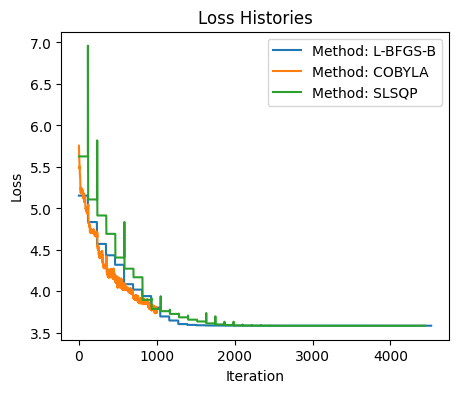

In [35]:
plot_loss_histories_one_plot_log(loss_histories)

In [36]:
accuracies_spambase, loss_histories_spambase, optimal_params = run_experiment(X, y)
average_accuracies_spambase = {method: np.mean(values) for method, values in accuracies_spambase.items()}

### Compare the methods

In [37]:
all_accuracies = {
    'Breast Cancer': accuracies_breast_cancer,
    'Banknote': accuracies_banknote,
    'Spambase': accuracies_spambase
}
all_average_accuracies = {
    'Breast Cancer': average_accuracies_breast_cancer,
    'Banknote': average_accuracies_banknote,
    'Spambase': average_accuracies_spambase
}

In [38]:
dataset_names = []
accuracies_data = []

for dataset_name, accuracies in all_accuracies.items():
    for method, acc_list in accuracies.items():
        dataset_names.append(f"{dataset_name} - {method}")
        accuracies_data.append(acc_list)

In [39]:
pd.DataFrame(all_average_accuracies)

,Breast Cancer,Banknote,Spambase
L-BFGS-B,0.982456,0.963636,0.895765
COBYLA,0.979825,0.963636,0.859826
SLSQP,0.982456,0.963636,0.895765


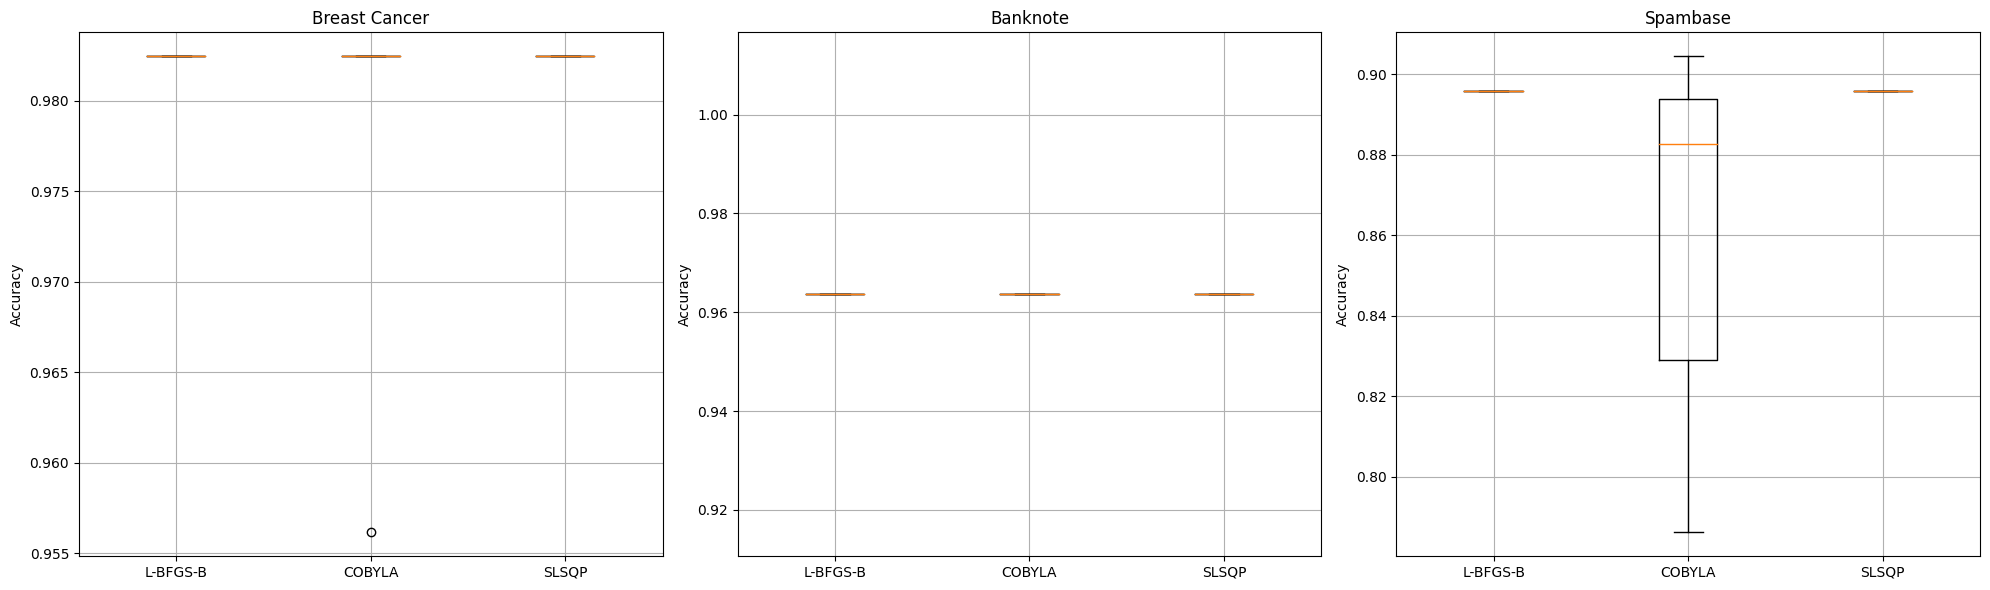

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for i, (dataset_name, accuracies) in enumerate(all_accuracies.items()):
    dataset_names = []
    accuracies_data = []

    for method, acc_list in accuracies.items():
        dataset_names.append(method)
        accuracies_data.append(acc_list)

    axs[i].boxplot(accuracies_data, labels=dataset_names)
    axs[i].set_title(dataset_name)
    axs[i].set_ylabel('Accuracy')
    axs[i].grid(True)

plt.tight_layout()
plt.show()